# Модуль B

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [28]:
file = pd.read_csv('preprocessed.csv', index_col=0)
file

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,3,0,0,6,25,1,1,41,0,1,...,0,1,1,0,0,0,0,1,0,2
1,3,0,1,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,1
2,1,0,2,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,2
3,3,1,3,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,2
4,3,1,4,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,7,1,3,7,3,51,0,16,...,0,0,1,0,0,0,0,0,1,1
101762,1,0,8,1,4,5,5,33,3,18,...,0,2,1,0,0,0,0,1,1,2
101763,3,1,7,1,1,7,1,53,0,9,...,0,0,1,0,0,0,0,0,1,2
101764,3,0,8,2,3,7,10,45,2,21,...,0,3,1,0,0,0,0,0,1,2


## 2.1 Отбор признаков

В качестве целевой переменной будем использовать переменную `readmitted`, которая означает, через какое время пациент обратится в больницу повторно. Очевидно, если пациент обращается повторно, то это может быть связано с тем, что назначенные ему препараты не помогают. Классы имеют следующие значения:
- Значение 0 соответствует тому, что пациент обратится в больницу менее, чем через тридцать дней
- Значение 1 соотвутствует обращению через период, больший месяца
- Значение 2 - пациент не обратится вовсе

Проиллюстрируем распределение целевой переменной:

<AxesSubplot:>

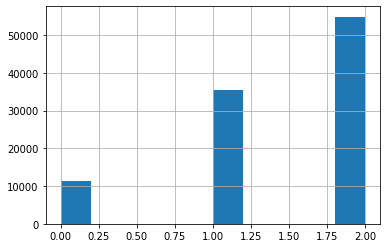

In [29]:
file['readmitted'].hist()

Для того, чтобы выбрать признаки, которые будем использовать при классификации, построим матрицу корреляций:

Text(0.5, 1.0, 'Correlation Matrix')

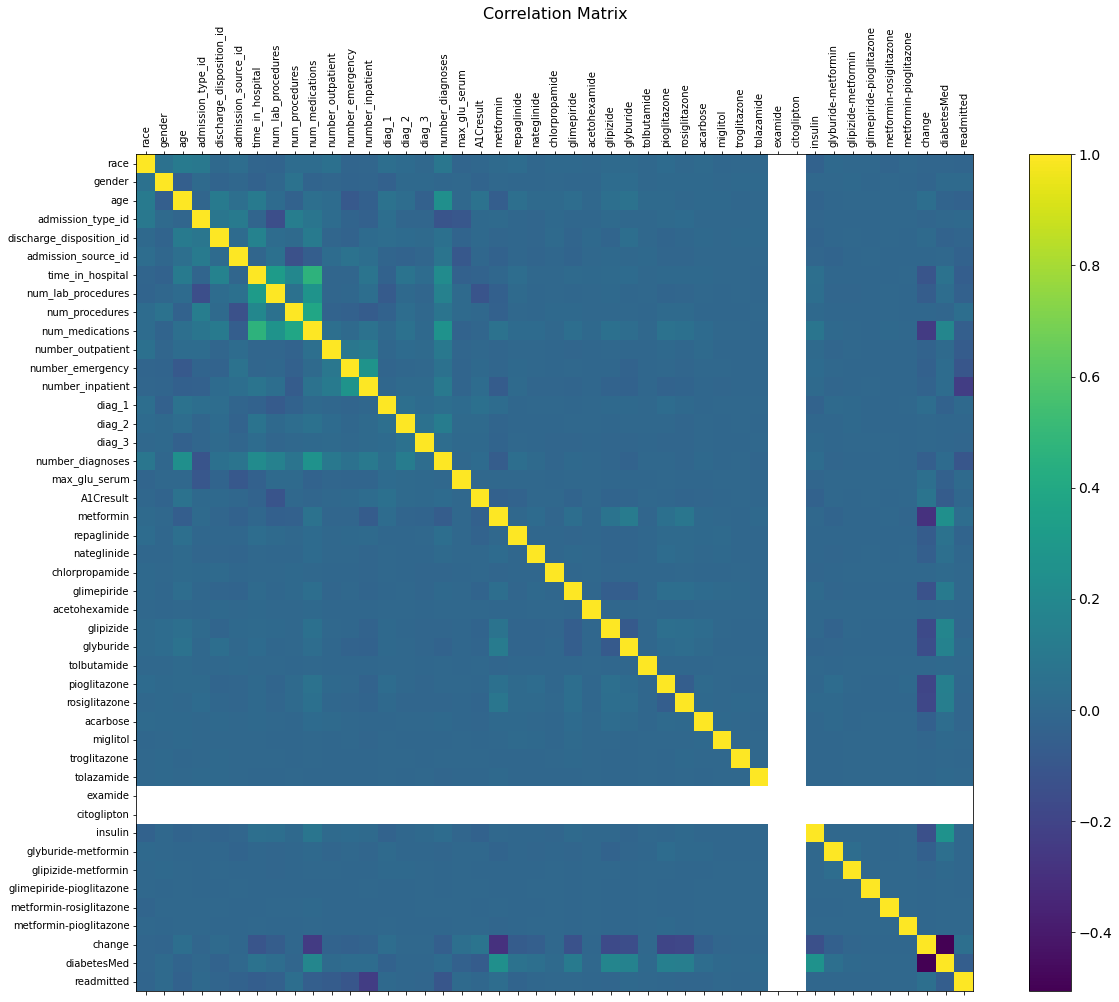

In [30]:
f = plt.figure(figsize=(20,15))
plt.matshow(file.corr(), fignum=f.number)
plt.xticks(range(len(file.columns)), file.columns, fontsize=10, rotation=90)
plt.yticks(range(len(file.columns)), file.columns, fontsize=10, va='center')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Как видно, на переменную `readmitted` (крайняя справа) больше всего влияют:
- `num_medications`
- `number_outpatient`
- `number_emergency`
- `number_inpatient`
- `number_diagnoses`
- `diabetesMed`

Чуть меньше влияют следующие переменные:
- `gender`
- `admission_type_id`
- `num_lab_procedures`
- `metformin`

Остальные переменные почти никак не влияют. Это может быть обусловлено тем, что некоторые препараты, например, даются далеко не всем пациентам, поэтому нельзя утверждать о наличии закономерности.

Построим распределения выбранных переменных

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

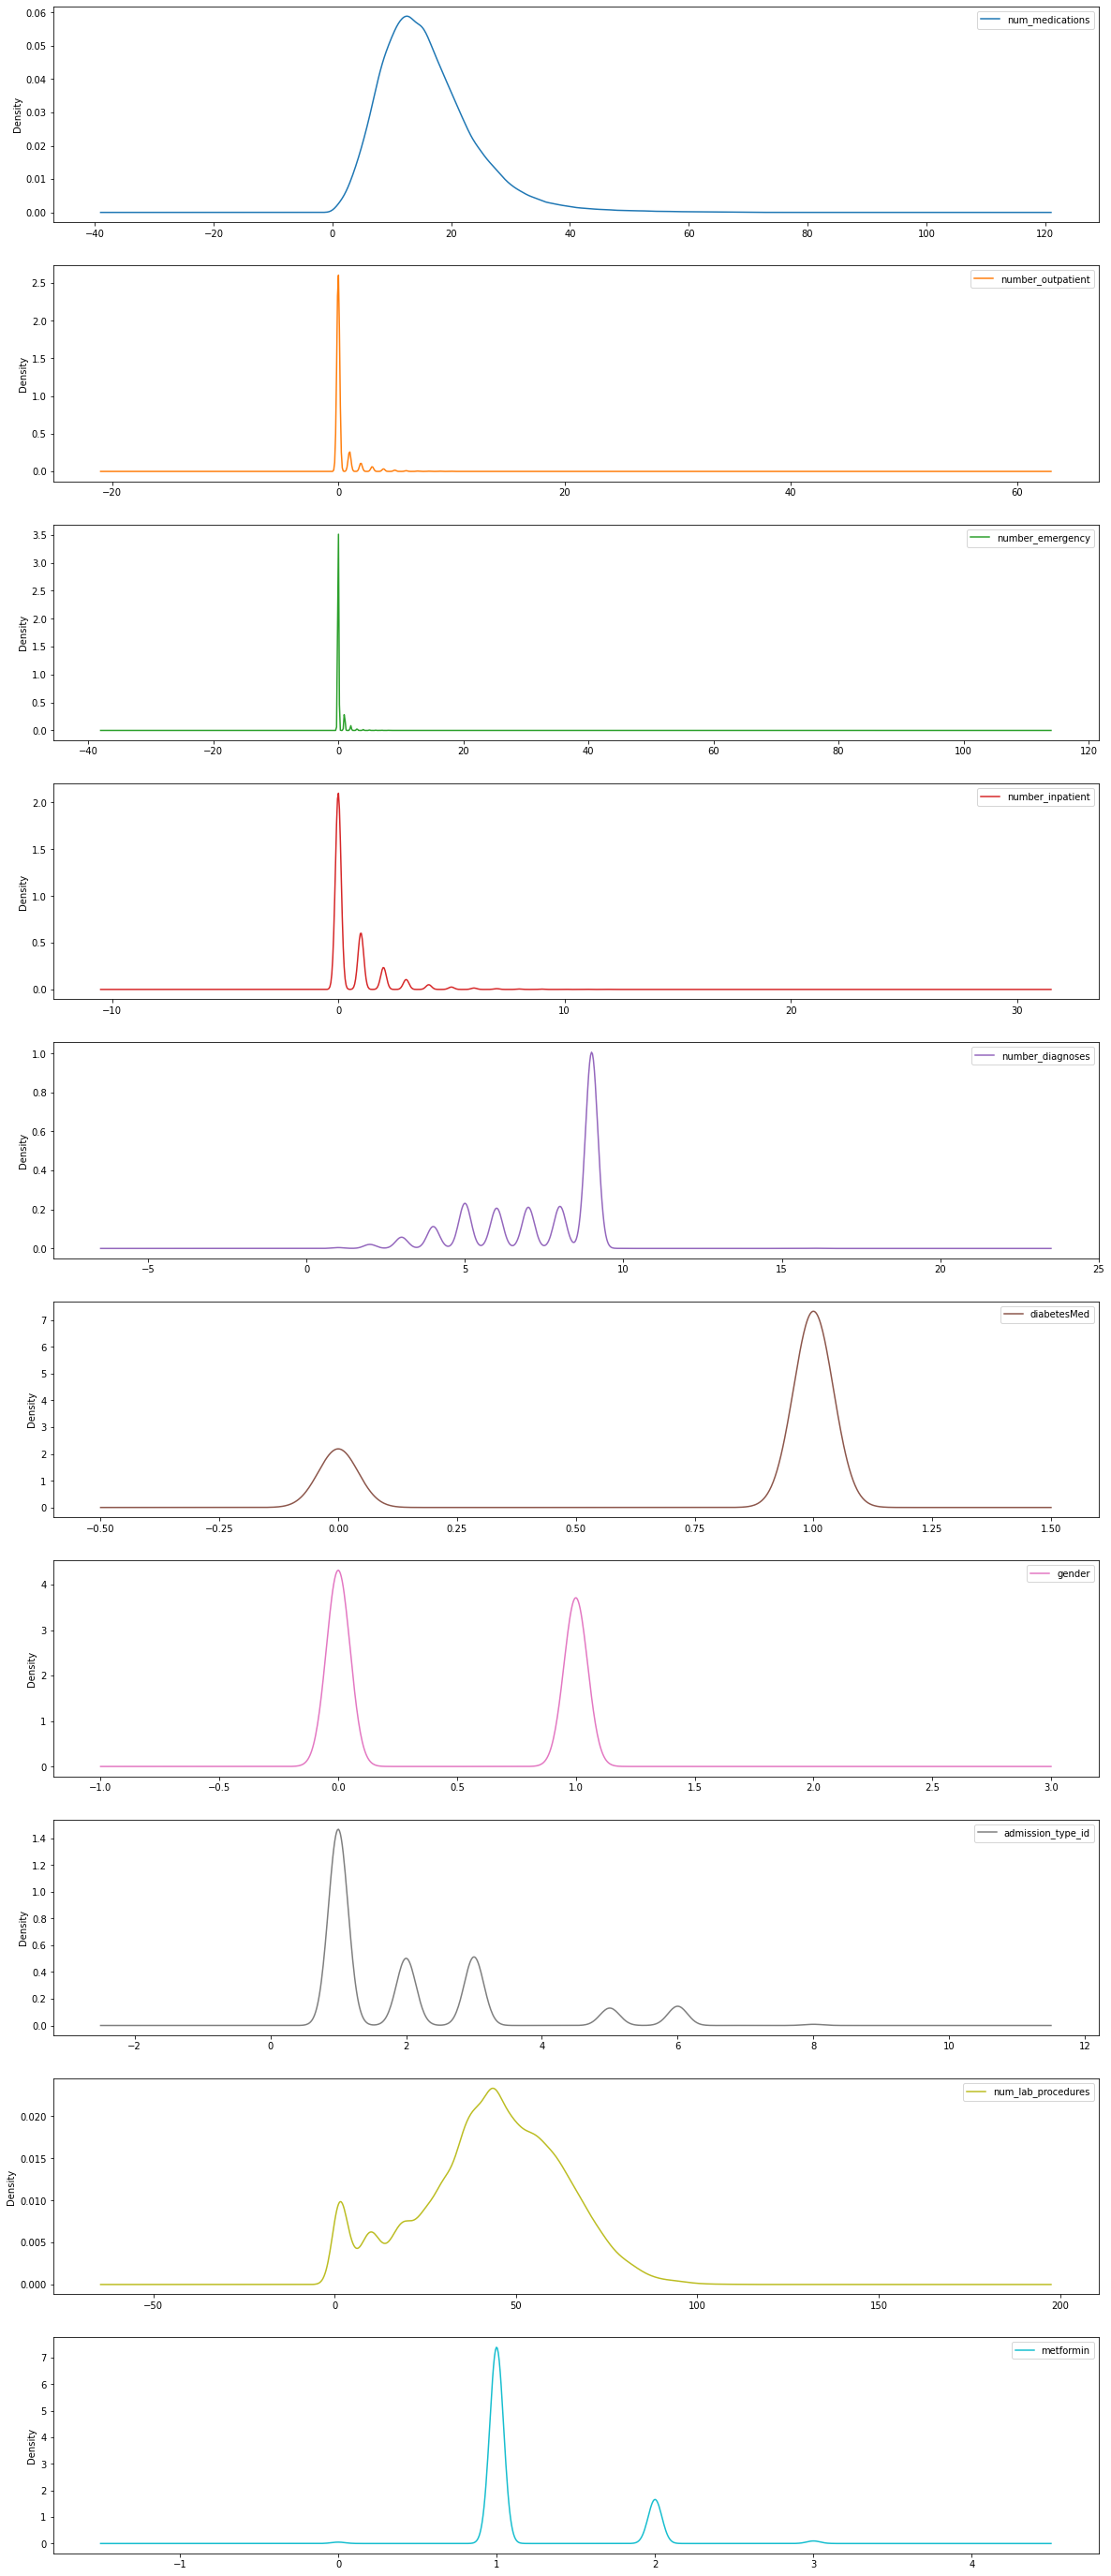

In [31]:
to_plot = ['num_medications',
           'number_outpatient',
           'number_emergency',
           'number_inpatient',
           'number_diagnoses',
           'diabetesMed',
           'gender',
           'admission_type_id',
           'num_lab_procedures',
           'metformin']

file[to_plot].plot(kind='kde', subplots=True, figsize = (20,50), sharex = False)

Построим теперь зависимости целевой переменной от этих переменных, и посмотрим, видны ли закономерности

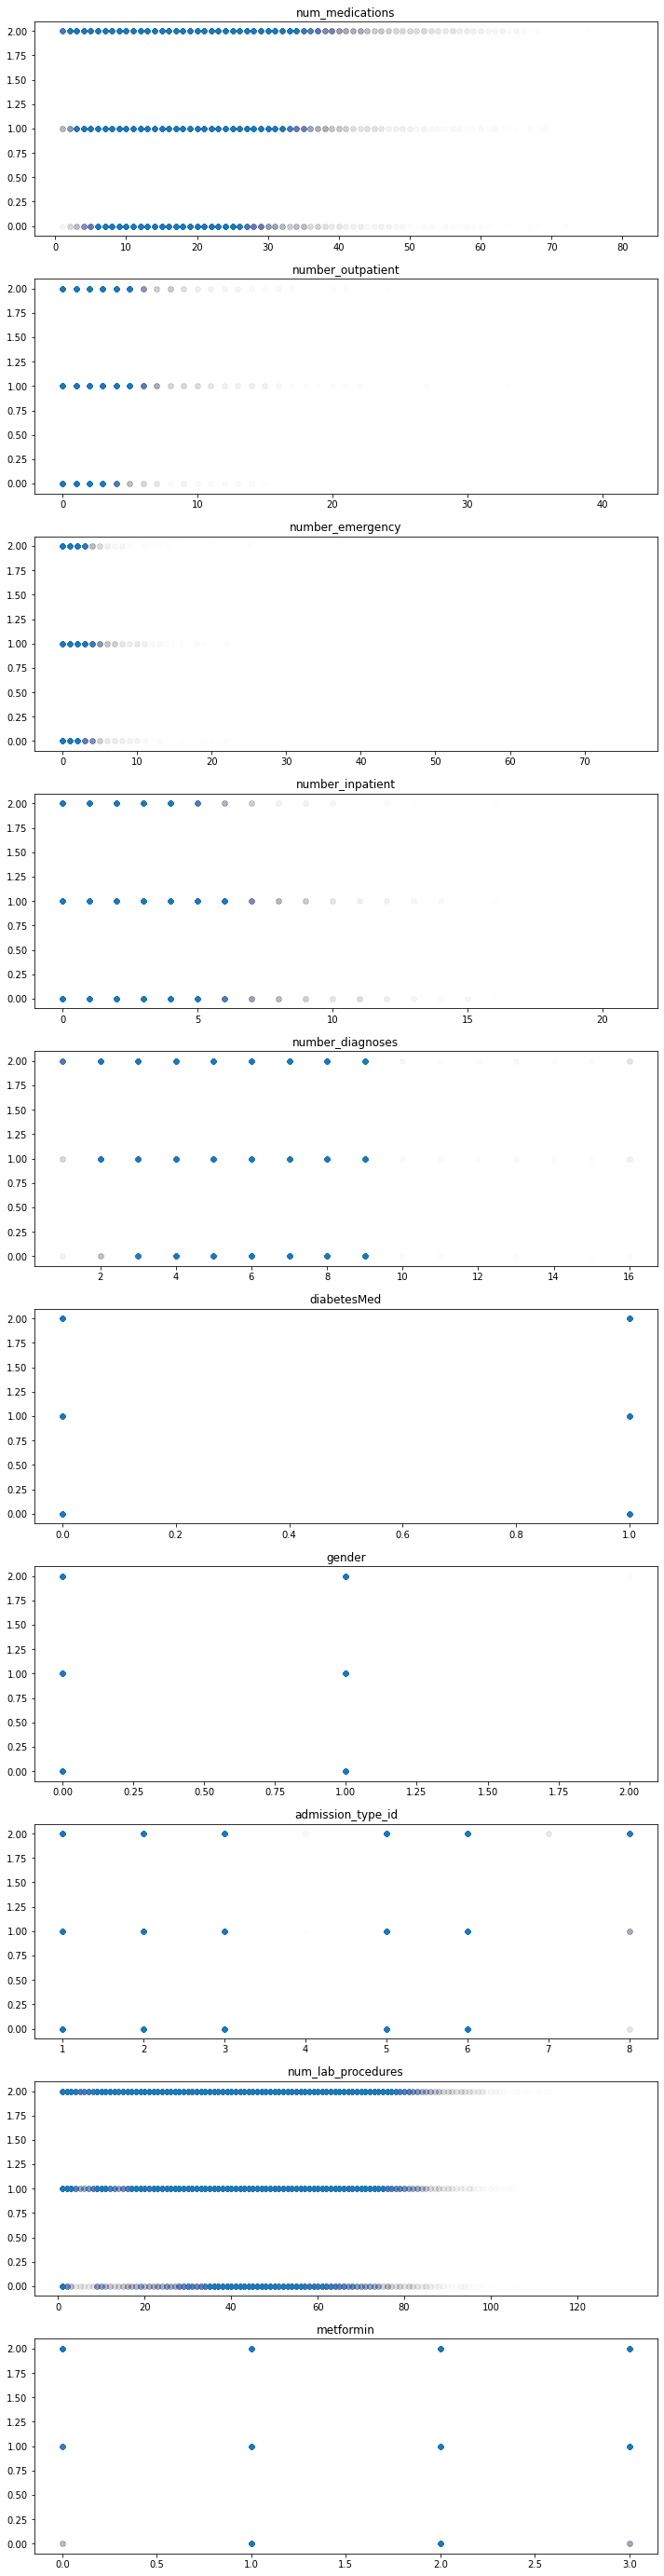

In [32]:
fig, axs = plt.subplots(10, 1,
                        **{'figsize': [12, 50]})
cnt1 = 0
cnt2 = 0
for i in to_plot:
    axs[cnt1].scatter(file[i], file['readmitted'],
                            alpha=0.005)
    axs[cnt1].set_title(i)
    cnt1 += 1
    if cnt1 == 15:
        cnt2 += 1
        cnt1 = 0

В данных графиках видны некоторые закономерности, например:
- Пациенты, либо не принимающие лекарства, либо принимающие от 40, имеют меньшую вероятность повторного обращения в больницу 
- Похожая ситуация наблюдается с количеством лабораторных процедур.
- Очевидно, что чем меньше диагнозов, тем меньше веротность повторного обращения в больницу.

Таким образом, можно утверждать о правильности выбранных переменных для дальнейшей классификации. Сохраним полученные данные. 

In [33]:
to_plot.append('readmitted')

In [34]:
file = file[to_plot]
file.to_csv('picked.csv')
file

,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed,gender,admission_type_id,num_lab_procedures,metformin,readmitted
0,1,0,0,0,1,0,0,6,41,1,2
1,18,0,0,0,9,1,0,1,59,1,1
2,13,2,0,1,6,1,0,1,11,1,2
3,16,0,0,0,7,1,1,1,44,1,2
4,8,0,0,0,5,1,1,1,51,1,2
...,...,...,...,...,...,...,...,...,...,...,...
101761,16,0,0,0,9,1,1,1,51,2,1
101762,18,0,0,1,9,1,0,1,33,1,2
101763,9,1,0,0,13,1,1,1,53,2,2
101764,21,0,0,1,9,1,0,2,45,1,2
